O dataset escolhido para esse notebook é o de dados de previsão de AVC que pode ser encontrado através do link abaixo:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Contexto
Segundo a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um derrame com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Informações do atributo
1) id: identificador único
2) gender: "Male", "Female" ou "Other"
3) age: idade do paciente
4) hypertension: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão
5) heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca
6) ever_married: "No" ou "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" ou "Self-employed"
8) Residence_type: "Rural" ou "Urban"
9) avg_glucose_level: nível médio de glicose no sangue
10) bmi: índice de massa corporal
11) smoking_status: "formerly smoked", "never smoked", "smokes" ou "Unknown"*
12) stroke: 1 se o paciente teve AVC ou 0 se não

*Observação: "Unknown" em smoking_status significa que as informações não estão disponíveis para este paciente, ou seja, teremos que lidar com essa informação na etapa de pré processamento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv', sep=',', index_col=0, na_values='?')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [3]:
dataset.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  F

In [4]:
# elimina as linhas com dados faltantes, além das linhas que apresentam o valor "Unknown" na coluna "smoking_status"
dataset = dataset.dropna(axis=0)
dataset = dataset[dataset['smoking_status'] != 'Unknown']
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


## Verificando balanceamento das classes

É de suma importância verificar se as classes estão balanceadas. Se há um desbalanceamento grande entre as classes por vezes é indicado utilizar técnicas de pré-processamento para balanceamento das classes, por outras vezes é indicado manter a proporção natural do problema. Porém, o balanceamento ou desbalanceamento de classes influencia qual medida será utilizada na avaliação do classificador, por exemplo a acurácia não é indicada para avaliar problemas onde as classes são desbalanceadas. 

Nesse contexto, vamos analisar a distribuição de indivíduos que tiveram derrame e que não derrame, a fim de tomar uma decisão acerca do balanceamento das classes

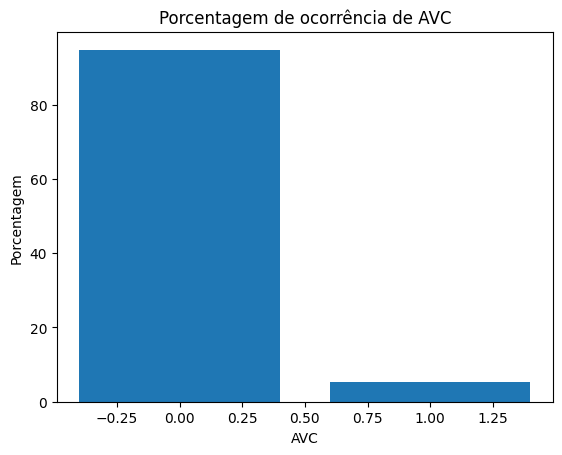

In [5]:
stroke_count = dataset["stroke"].value_counts()
percentage = stroke_count / len(dataset) * 100

stroke_count

plt.bar(percentage.index, percentage.values)
plt.xlabel('AVC')
plt.ylabel('Porcentagem')

plt.title('Porcentagem de ocorrência de AVC')

plt.show()

Como podemos ver, a quantidade de indivíduos que tiveram derrame é muito inferior, o que representa bem o contexto real dessa condição no mundo.

"AVC no Mundo

Em 2019, de acordo com o grupo Global Burden of Diseases (GBD) Study, que compila dados mundiais e foram recentemente publicados por Feigin e colaboradores, do GBD Study, foram contabilizados 12.2 milhões de casos incidentes de AVC, com 6.55 milhões de mortes.

Globalmente, o AVC é a segunda causa de morte (cerca de 11% das mortes totais). No Brasil, essa relação (IAM/AVC) era inversa, com a doença passando para segundo lugar apenas nos últimos anos, a partir de 2016 (dados do DATASUS)."
fonte: https://avc.org.br/sobre-a-sbavc/numeros-do-avc-no-brasil-e-no-mundo/

Sendo assim, visando manter uma distribuição realista, vamos manter a proporção natural do problema.

## Normalizando os dados

A maior parte dos algoritmos de classificação só trabalham com dados numéricos, por isso é necessário transformar dados categóricos em numéricos.

In [6]:
dataset = pd.get_dummies(dataset)
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
56669,81.0,0,0,186.21,29.0,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68398,82.0,1,0,71.97,28.3,0,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
45010,57.0,0,0,77.93,21.7,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


Note que na tabela acima o número de atributos aumentou, saindo de 11 colunas, para 21. Agora, todos os atributos não numéricos, tiveram seus valores transformados em atributos.

É importante deixar os atributos numa mesma escala de valor, para que um determinado atributo não tenha maior influência sobre os outros atributos no aprendizado do modelo.

In [7]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.loc[:, dataset.columns != 'num']
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.791667,0.0,1.0,0.801265,0.311801,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.972222,0.0,1.0,0.234512,0.260870,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.541667,0.0,0.0,0.536008,0.284472,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.958333,1.0,0.0,0.549349,0.155280,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.986111,0.0,0.0,0.605161,0.217391,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.000000,1.0,0.0,0.077786,0.208696,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3422,0.652778,0.0,0.0,0.105300,0.126708,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3423,0.986111,0.0,0.0,0.323516,0.354037,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3424,0.347222,0.0,0.0,0.128658,0.237267,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Correlação entre atributos

Estabelecer a correlação entre atributos pode auxiliar na identificação de relações mútuas entre fatores distintos. Neste âmbito, a correlação pode ser utilizada na modelagem e previsão de modelos mais precisos de estudos a partir da influência estatística de um atributo sobre o fenômeno em questão.

No caso do dataset escolhido no presente trabalho, avaliar a influência de fatores que impactam a ocorrência do AVC pode ser extremamente importante para evitar que essa doença seja tão recorrente como nos dias de hoje.

Para estabelecer essa análise, será preciso utilizar a biblioteca seaborn.

In [8]:
import seaborn as sns

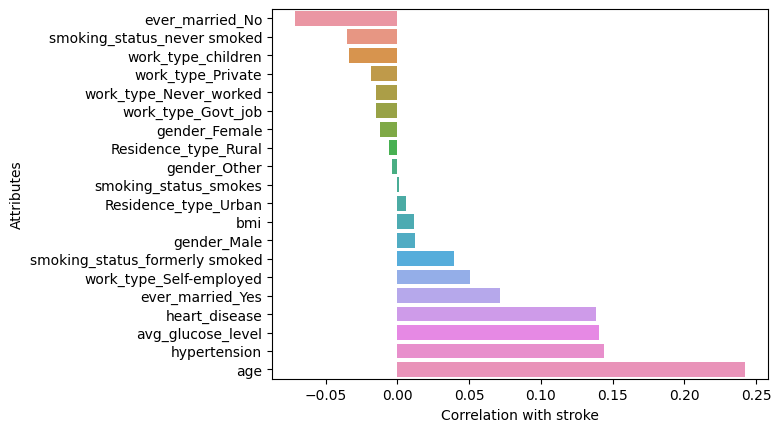

In [9]:
corr = dataset.corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True) 

sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

Analisando a figura acima, pode-se ver alguns pontos interessantes :

-  A idade possui uma taxa de correlação relativamente alta (0.25) com a ocorrência do AVC. Além disso fatores como a hipertensão (0.14) e doenças cardíaca (0.13) estão intrisecamente ligadas ao surgimento dessa doença.

- O atributo que informa se o homem já foi casado alguma vez na vida possui uma correlação relativamente alta (0.07) com a ocorrência de AVC. Contudo, deve-se atentar a atributos como este, já que não é necessário que haja uma causalidade direta, tendo como base que outras variáveis não consideradas podem estar envolvidas. Por exemplo, quanto maior a idade, maior a chance da pessoa ter se casado, o que leva a uma maior probabilidade de se ter o AVC de forma indireta.


Ademais, plotou-se a correlação entre todos os atributos. Analisar esses fatores pode ser importante para ver as relações entre eles, como também eliminar alguns atributos redundantes.

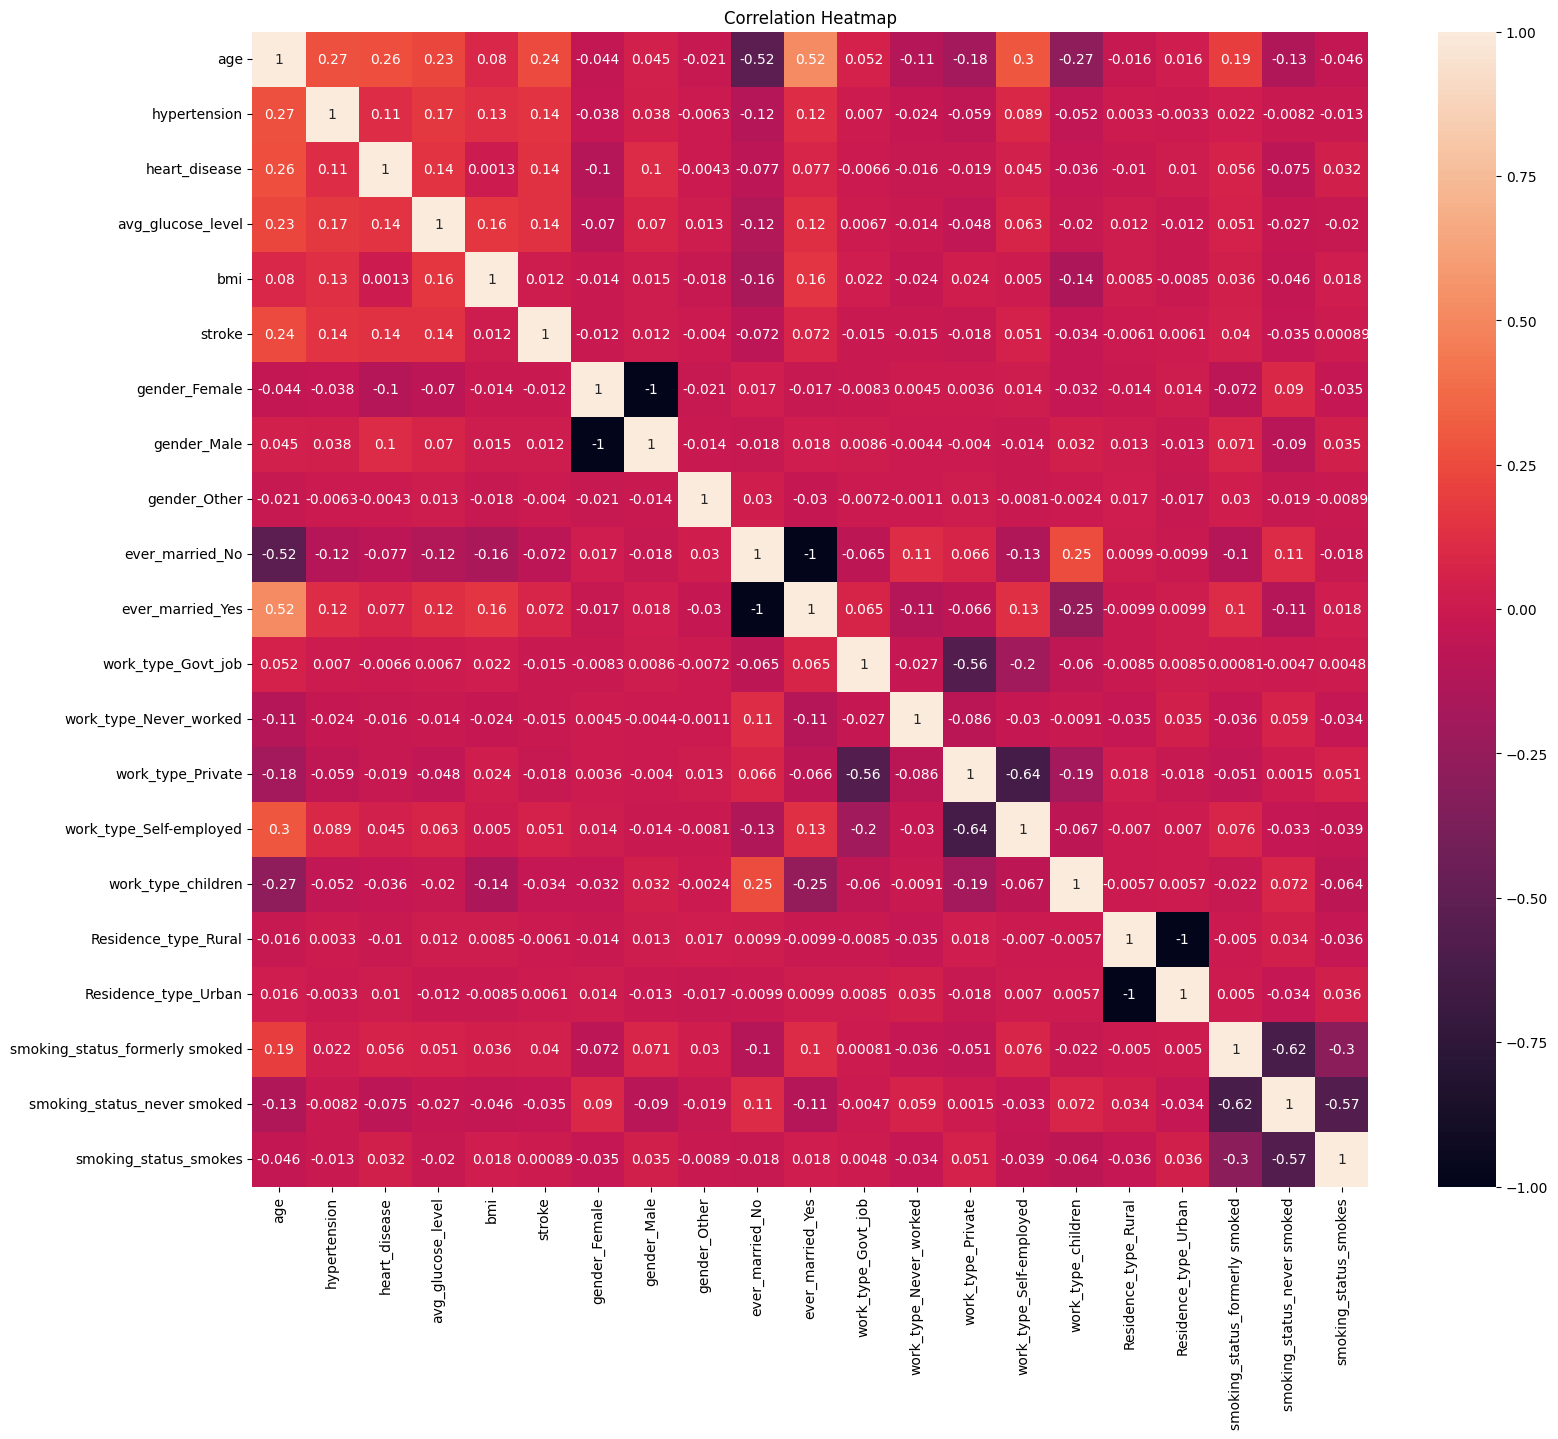

In [10]:
plt.figure(figsize=(18, 15))
sns.heatmap(dataset.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

Talvez podemos utilizar somente o "avg_glucose_level" ao invés de utilizar o "avg_glucose_level", "heart_disease", e "hypertension"
Da mesma forma, podemos utilizar somente o "bmi", ao invés do "bmi" e "gender_Male"

O atributo "age" é o que tem maior correlação com AVC
Podemos representar essa correlação com o histograma abaixo:

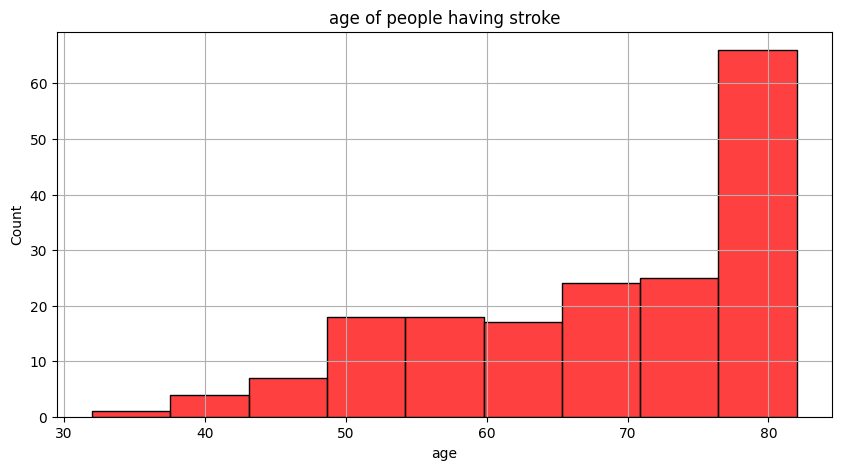

In [11]:
plt.figure(figsize=(10,5))
strokes_dataset = dataset[dataset['stroke'] == 1]
sns.histplot(strokes_dataset['age'], color="red")
plt.title("age of people having stroke")
plt.grid()

Podemos remover algumas colunas, tendo em vista que as mesmas não apresentam uma correlação extremamente baixa

Supostamente, após essa etapa da correlação, finalizamos todo o pré-processamento

## Aplicar o algoritmos de classificação com Árvores de Decisão

Uma árvore de decisão geralmente se inicia com um único nó - denominado "nó raiz", que se ramifica em  resultados possíveis. Em seguida, cada um desses resultados se ramifica em nós adicionais, que se dividem em outras possibilidades - e assim segue em diante. Desse modo, visualmente tem-se a forma de uma "árvore".

A árvore de descisão é apenas uma estrutura representativa. Para criar de fato as escolhas dessas regras que formam a árvore, é necessário o uso de algoritmos de Machine Learning.

Para começar a representação, é necessário se ter os dados separados. 

In [12]:
# Separando o dataset no conjunto de atributos X e classe y.
X = dataset.loc[:, dataset.columns != 'stroke'] 
y = np.array(dataset.loc[:, dataset.columns == 'stroke']).ravel()

Para criar os dados de treinamento e de testes, utiliza-se a função train_test_split. Os parâmetros utilizados nessa função são as entradas (x e y), o tamanho do dataset de teste e uma "seed" que inicializa o gerador de números pseudos-aleatórios.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Já com os dados de testes em mão, pode-se criar um modelo de árvore de decisão. No bloco abaixo, foi passado o parâmetro 'gini' como critério do algortimo - o que implica que será utilizado o índice de impureza de Gini para calcular a qualidade da divisão. Já o termo "random_state" apenas garante a aleatoriedade do algoritmo.

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)  #criando o objeto
clf.fit(X_train, y_train)   #treino o modelo
predict = clf.predict(X_test)   #realiza a previsão

Pode-se plotar a árvore para visualizar seu tamanho.


----Precisa dessas biblios quem for rodar
pip install graphviz
pip install pydotplus

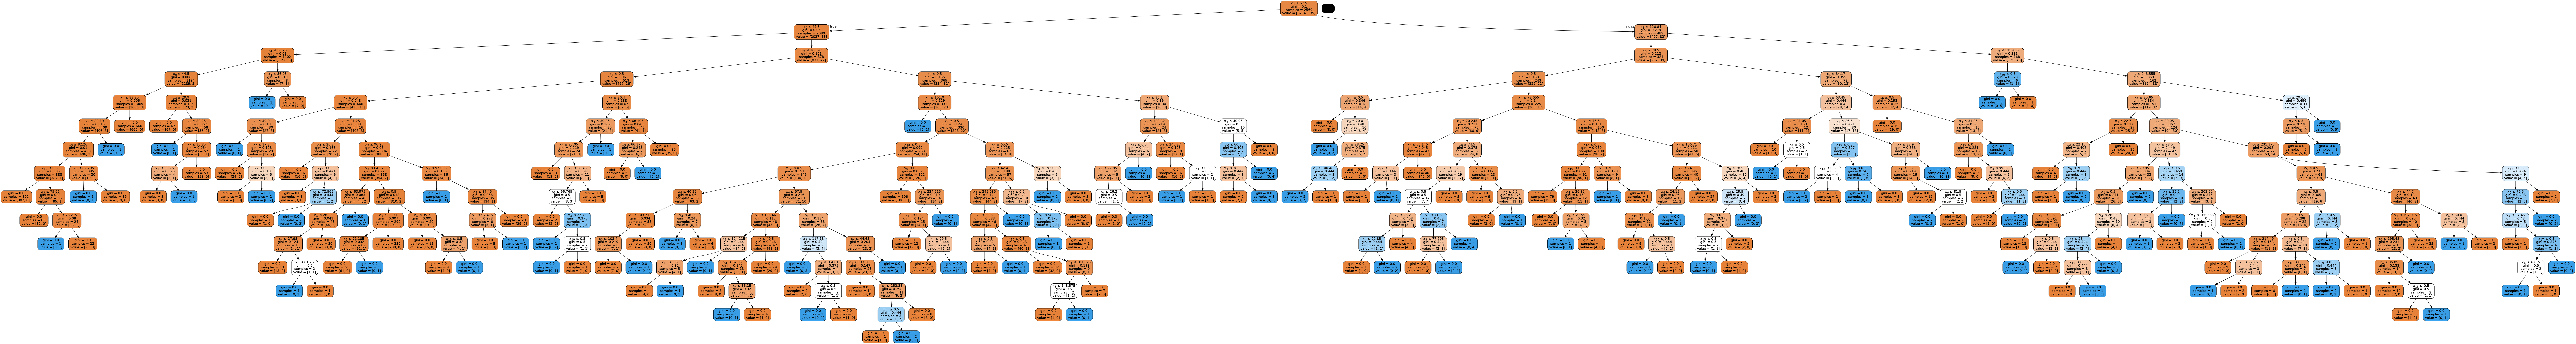

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

Por último, pode-se calcular a acurácia do modelo.

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predict)
print(f'A acurácia do Classificador é: {acc :.2%}')

A acurácia do Classificador é: 90.67%


## Aplicar o algoritmos de classificação com K-Nearest Neighbors (KNN)

O algortimo de classificação com K-Nearest Neighbors (KNN) é um classificador que tem como base para a classificação a similiaridade de um dado com seus vizinhos mais próximos. Neste âmbito, quando um conjunto de dados a ser classificado é apresentado para o algortimo, o mesmo calcula a distância entre os dados novos com os já usados no treinamento. A partir destas distâncias, a classificação ocorre com base nos 'k' vizinhos mais próximos dos dados introduzidos.


Na implementação realizada, a variável knn é instanciada como um objeto da classe KNeighborsClassifier. Em seguida, a função GridSearchCV faz uma busca em grade com o intuito de achar a melhor combinação de parâmetros de um classificador KNN. 

Nessa função em específico, é passado como parâmetro o objeto do classificador knn; um dicionário que contém a quantidade de vizinhos a serem variadas para a escolha do melhor parâmetro; um número relativo a quantidade de partições utilizadas na validação cruzada e a métrica de avaliação utilizada para medir o desempenho do classificador.

Em seguida, o método fit treina o modelo com os dados de treinamento.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')  #mudar para 10?
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Depois de realizada a busca em grade, pode-se acessar o atributo cv_results - que contém informações relavantes das combinações de parâmetros testadas. Para melhor visualização, utilizou-se um dataframe para dispor os resultados em uma tabela.

In [18]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004744,0.000433,0.286416,0.493280,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.908163,0.927007,0.906569,0.908029,0.905109,0.910976,0.008092,13
1,0.004843,0.000929,0.012205,0.002949,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.908163,0.927007,0.906569,0.908029,0.905109,0.910976,0.008092,13
2,0.003848,0.000496,0.040142,0.001944,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.940233,0.934307,0.937226,0.940146,0.940146,0.938412,0.002349,11
3,0.005291,0.000726,0.011332,0.002859,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.940233,0.934307,0.935766,0.938686,0.938686,0.937536,0.002167,12
4,0.004406,0.000870,0.041926,0.002879,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.940233,0.941606,0.944526,0.944526,0.937226,0.941623,0.002761,10
5,0.004129,0.000107,0.013438,0.003088,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.940233,0.943066,0.945985,0.943066,0.937226,0.941915,0.002967,9
6,0.003976,0.000901,0.039417,0.001823,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.944606,0.945985,0.945985,0.944526,0.941606,0.944542,0.001600,7
7,0.004416,0.000519,0.011308,0.000934,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.944606,0.944526,0.945985,0.944526,0.943066,0.944542,0.000924,7
8,0.004007,0.000791,0.040402,0.002120,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.947522,0.947445,0.947445,0.944526,0.947445,0.946877,0.001176,4
9,0.004156,0.000656,0.013693,0.000812,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.947522,0.945985,0.947445,0.947445,0.945985,0.946877,0.000728,4


Posteriormente, filtrou-se a tabela para se ter apenas os parâmetros mais importantes. Neste âmbito, foi deixada apenas as colunas referentes as chaves :

'params' :  refere-se a combinação de parâmetros em questão

'mean_test_score' : pontuação média da validação cruzada 

'std_test_score': desvio padrão das pontuações da validação cruzada

'rank_test_score': ranking das pontuações da validação cruzada


In [19]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.947753,0.000577,1
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.947753,0.000577,1
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.947461,0.000031,3
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.946877,0.001176,4
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.946877,0.000728,4
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.946877,0.000728,4
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.944542,0.001600,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.944542,0.000924,7
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.941915,0.002967,9
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.941623,0.002761,10


## Aplicar o algoritmos de classificação com Multilayer Perceptron (MLP)

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [42]}

mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=5, scoring='accuracy')
gs_mlp.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [42]},
             scoring='accuracy')

In [21]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.947461,0.000031,1
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.946877,0.001480,2
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.946877,0.000728,3
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.945417,0.003414,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.944833,0.005344,5
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.944249,0.004283,6
